In [3]:
import pandas as pd

url = 'https://gist.githubusercontent.com/guilhermesilveira/2d2efa37d66b6c84a722ea627a897ced/raw/10968b997d885cbded1c92938c7a9912ba41c615/tracking.csv'
dados = pd.read_csv(url)
dados

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0
...,...,...,...,...
94,0,0,1,0
95,1,1,1,1
96,0,0,1,0
97,0,1,0,0


In [6]:
#features
x = dados[['home', 'how_it_works', 'contact']]
#
y = dados[['bought']]

## separando treino e teste


In [9]:
dados.shape

(99, 4)

In [11]:
# pegando aproximadamente 75% da base para treino e 25% para teste
treino_x = x[:75]
treino_y = y[:75]

teste_x = x[75:]
teste_y = y[75:]

print(f'Treinaremos com {len(treino_x)} e testaremos com {len(teste_x)} elementos')

Treinaremos com 75 e testaremos com 24 elementos


## Modelo

In [13]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(X = treino_x, y=treino_y)

C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearSVC()

In [15]:
previsoes = modelo.predict(teste_x)
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0], dtype=int64)

In [24]:
from sklearn.metrics import accuracy_score

acuracia = accuracy_score(y_true = teste_y, y_pred = previsoes)
print(f'A acuracia foi {acuracia * 100:.2f}%')

A acuracia foi 95.83%


## Separando TReino e Teste usando sklearn

In [25]:
from sklearn.model_selection import train_test_split

In [41]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = .25)
print(f'Treinaremos com {len(train_x)} e testaremos com {len(test_x)} elementos')

modelo = LinearSVC()
modelo.fit(X = train_x, y=train_y)
predicts = modelo.predict(test_x)
predicts
acuracia = accuracy_score(y_true = test_y, y_pred = predicts)
print(f'A acuracia foi {acuracia * 100:.2f}%')

Treinaremos com 74 e testaremos com 25 elementos
A acuracia foi 100.00%


C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Identificado que a aleatoridade da escolha do split... pode gerar acuracias diferentes
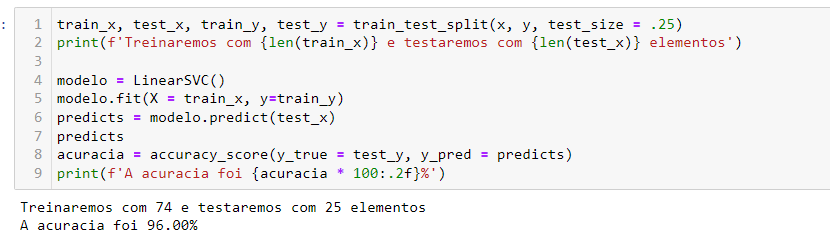

## Definindo uma SEED (Semente)

In [44]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = .25, random_state=20)
print(f'Treinaremos com {len(train_x)} e testaremos com {len(test_x)} elementos')

modelo = LinearSVC()
modelo.fit(X = train_x, y=train_y)
predicts = modelo.predict(test_x)
predicts
acuracia = accuracy_score(y_true = test_y, y_pred = predicts)
print(f'A acuracia foi {acuracia * 100:.2f}%')

Treinaremos com 74 e testaremos com 25 elementos
A acuracia foi 96.00%


C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


## Observação

A separação do treino e teste não esta proporcinal. Note que a base de treino contem uma relação diferente da base de teste. Esta **DESBALANCEADA**.

In [60]:
print(train_y.value_counts())
bought = train_y.value_counts()[1]
not_bought = train_y.value_counts()[0]
print(f'Não compraram:{not_bought} / Compraram:{bought} | Proporção de {bought/(not_bought + bought)*100:.2f}%')


bought
0         47
1         27
dtype: int64
Não compraram:47 / Compraram:27 | Proporção de 36.49%


In [61]:
test_y.value_counts()
bought = test_y.value_counts()[1]
not_bought = test_y.value_counts()[0]
print(f'Não compraram:{not_bought} / Compraram:{bought} | Proporção de {bought/(not_bought + bought)*100:.2f}%')

Não compraram:19 / Compraram:6 | Proporção de 24.00%


## Balanceamento / Estratificar
Melhorou a proporção das amostras

In [65]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = .25, random_state=20, stratify=y)
print(f'Treinaremos com {len(train_x)} e testaremos com {len(test_x)} elementos')

modelo = LinearSVC()
modelo.fit(X = train_x, y=train_y)
predicts = modelo.predict(test_x)
predicts
acuracia = accuracy_score(y_true = test_y, y_pred = predicts)
print(f'A acuracia foi {acuracia * 100:.2f}%')

Treinaremos com 74 e testaremos com 25 elementos
A acuracia foi 96.00%


C:\Users\fabiokfouri\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [66]:
print(train_y.value_counts())
bought = train_y.value_counts()[1]
not_bought = train_y.value_counts()[0]
print(f'Não compraram:{not_bought} / Compraram:{bought} | Proporção de {bought/(not_bought + bought)*100:.2f}%')

bought
0         49
1         25
dtype: int64
Não compraram:49 / Compraram:25 | Proporção de 33.78%


In [67]:
test_y.value_counts()
bought = test_y.value_counts()[1]
not_bought = test_y.value_counts()[0]
print(f'Não compraram:{not_bought} / Compraram:{bought} | Proporção de {bought/(not_bought + bought)*100:.2f}%')

Não compraram:17 / Compraram:8 | Proporção de 32.00%
